# Home Dataset Creation

This notebook is used to create the home dataset, by composing different appliances and their respective power consumption. The dataset used is GREEND. The power consumption and metadata are read from the dataset using the [nilmtk](https://github.com/nilmtk) library.

## Setup

In [ ]:
%pip install git+https://github.com/nilmtk/nilmtk # Install from git because the conda package is out of date
%pip install git+https://github.com/nilmtk/nilm_metadata 

## GREEND

In [1]:
from nilmtk import DataSet

greend = DataSet('data/greend.h5')

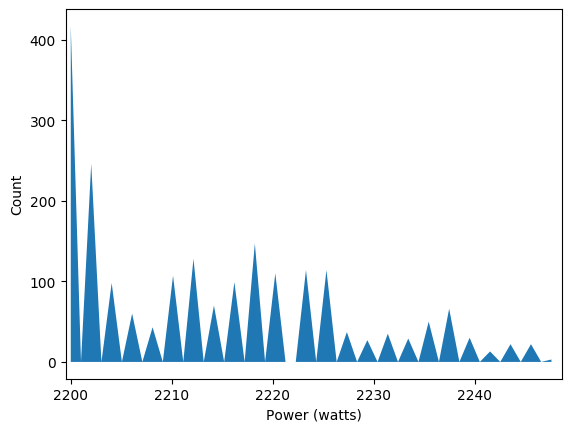

In [4]:
greend.buildings[3].elec["washing machine"].plot_power_histogram()

In [18]:
appliances = {
    3: ['microwave', 'washing machine', 'audio amplifier'],
    5: ['desktop computer', 'television', 'fridge', 'dish washer']
}

def replace_with_average(group):
    group['power'] = group['power'].mean()
    return group.iloc[:1]

for building, appliance_list in appliances.items():
    print("> Building:", building)
    for appliance in appliance_list:
        print(f"  - Appliance: {appliance} ... ", end="")
        name_undercase = appliance.replace(' ', '_')

        df = next(greend.buildings[building].elec[appliance].load()).reset_index()
        df.columns = ["timestamp", "power"]
        df.drop(columns=["timestamp"], inplace=True)
        #df = df.groupby(df.index // 60).apply(replace_with_average)
        #df = df.reset_index(drop=True)
        df = df.rolling(60, min_periods=1).mean()[::60]

        df.to_csv(f"appliances/{name_undercase}.csv", index=False)
        print("OK")

> Building: 1
  - Appliance: lamp ... OK
> Building: 3
  - Appliance: microwave ... OK
  - Appliance: washing machine ... OK
  - Appliance: audio amplifier ... OK
> Building: 5
  - Appliance: desktop computer ... OK
  - Appliance: television ... OK
  - Appliance: fridge ... OK
  - Appliance: dish washer ... OK


In [24]:
import numpy as np

activations = greend.buildings[5].elec['television'].get_activations(min_off_duration=10, min_on_duration=10, on_power_threshold=10)

lens = [len(a) for a in activations]
lens_mean = np.mean(lens)
print(len(activations), lens_mean)

In [3]:
import os 

activations ={
    3: {'microwave': [20,10,20], 'washing machine': [30,30,20], 'audio amplifier': [5,5,10]},
    # 5 is on kaggle due to local mem constraints
}

for building, appliance_list in activations.items():
    print("> Building:", building)
    for appliance, params in appliance_list.items():
        print(f"  - Appliance: {appliance} ... ", end="")
        name_undercase = appliance.replace(' ', '_')

        #app = pd.read_csv(f"appliances/{name_undercase}.csv"
        app = greend.buildings[building].elec[appliance].get_activations(min_off_duration=params[0], min_on_duration=params[1], on_power_threshold=params[2])

        os.mkdir(f"activations/{name_undercase}")

        for i, activ in enumerate(app):
            activ.reset_index(drop=True, inplace=True)
            activ.dropna(inplace=True)
        
            activ.to_csv(f"activations/{name_undercase}/{i}.csv", index=False)

        print("OK")

> Building: 1
  - Appliance: fridge ... 

/tmp/ipykernel_26326/3344452769.py:23: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  activ.to_csv(f"activations/{name_undercase}/{i}.csv", index=False)


OK
  - Appliance: lamp ... OK
  - Appliance: television ... OK
> Building: 3
  - Appliance: microwave ... OK
  - Appliance: washing machine ... OK
  - Appliance: audio amplifier ... OK


## UK-DALE

In [1]:
from nilmtk import DataSet

ukdale = DataSet('data/ukdale.h5')

In [173]:
ac = ukdale.buildings[5].elec.all_meters()[24]
df = next(ac.load())
df = df["power"]["active"].reset_index()
df.columns = ["timestamp", "power"]
df.drop(columns=["timestamp"], inplace=True)

df = df.rolling(60, min_periods=1).mean()[::60]

df.to_csv(f"appliances/ac.csv", index=False)
print("OK")

OK


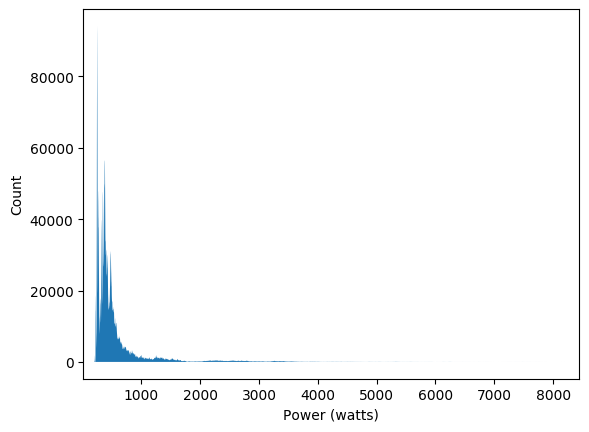

In [27]:

ac = ukdale.buildings[5].elec.all_meters()[24].plot_power_histogram()

In [32]:
import numpy as np
import os

ac = ukdale.buildings[5].elec.all_meters()[24]
activations = ac.get_activations(min_off_duration=120, min_on_duration=120, on_power_threshold=300)

lens = [len(a) for a in activations]
lens_mean = np.mean(lens)
print(len(activations), lens_mean)

os.mkdir(f"activations/ac")

for i, activ in enumerate(activations):
    activ.reset_index(drop=True, inplace=True)
    activ.dropna(inplace=True)

    activ.to_csv(f"activations/ac/{i}.csv", index=False)

print("OK")

1095 5763.330593607306


/tmp/ipykernel_45841/3623357510.py:17: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  activ.to_csv(f"activations/ac/{i}.csv", index=False)


OK


In [181]:
boiler = ukdale.buildings[4].elec["boiler"]
df = next(boiler.load())
df = df["power"]["active"].reset_index()
df.columns = ["timestamp", "power"]
df.drop(columns=["timestamp"], inplace=True)

df = df.rolling(10, min_periods=1).mean()[::10]

df.to_csv(f"appliances/boiler.csv", index=False)
print("OK")

OK


In [7]:

ukdale.buildings[4].elec.appliances[3].metadata

{'fuel': 'natural gas',
 'instance': 1,
 'meters': [4],
 'original_name': 'gas_boiler',
 'type': 'boiler',
 'dataset': 'UK-DALE',
 'building': 4}

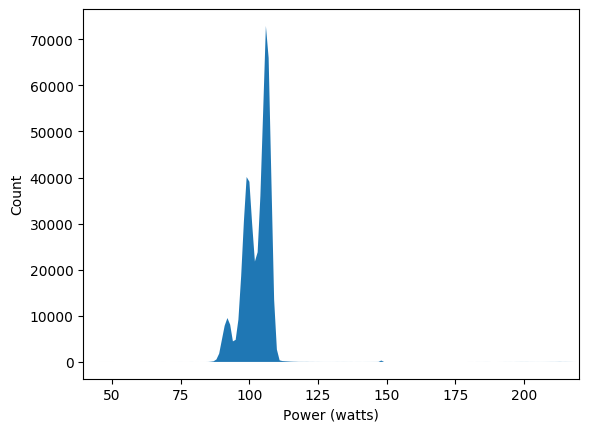

In [33]:

boiler = ukdale.buildings[4].elec["boiler"].plot_power_histogram()

In [34]:
boiler = ukdale.buildings[4].elec["boiler"]
activations = boiler.get_activations(min_off_duration=10, min_on_duration=5, on_power_threshold=50)

lens = [len(a) for a in activations]
lens_mean = np.mean(lens)
print(len(activations), lens_mean)

os.mkdir(f"activations/boiler")

for i, activ in enumerate(activations):
    activ.reset_index(drop=True, inplace=True)
    activ.dropna(inplace=True)

    activ.to_csv(f"activations/boiler/{i}.csv", index=False)

print("OK")

607 903.6457990115322


/tmp/ipykernel_45841/526963643.py:14: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  activ.to_csv(f"activations/boiler/{i}.csv", index=False)


OK


In [185]:
lamp = ukdale.buildings[1].elec.all_meters()[21]
df = next(lamp.load())
df = df["power"]["active"].reset_index()
df.columns = ["timestamp", "power"]
df.drop(columns=["timestamp"], inplace=True)

df = df.rolling(10, min_periods=1).mean()[::10]

df.to_csv(f"appliances/lamp.csv", index=False)
print("OK")

OK


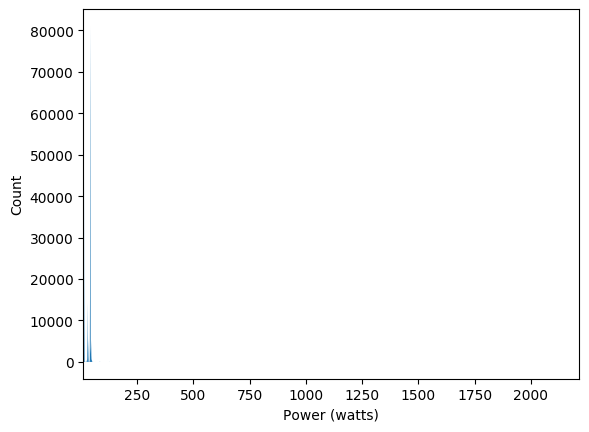

In [35]:

lamp = ukdale.buildings[1].elec.all_meters()[21].plot_power_histogram()

In [36]:
lamp = ukdale.buildings[1].elec.all_meters()[21]
activations = lamp.get_activations(min_off_duration=1, min_on_duration=1, on_power_threshold=5)

lens = [len(a) for a in activations]
lens_mean = np.mean(lens)
print(len(activations), lens_mean)

os.mkdir(f"activations/lamp")

for i, activ in enumerate(activations):
    activ.reset_index(drop=True, inplace=True)
    activ.dropna(inplace=True)

    activ.to_csv(f"activations/lamp/{i}.csv", index=False)

print("OK")

812 412.7894088669951


/tmp/ipykernel_45841/2740407595.py:14: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  activ.to_csv(f"activations/lamp/{i}.csv", index=False)


OK
